In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('../data/interim/01_ParaNMT_cleaned.csv')
df.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


Text(0, 0.5, 'Words')

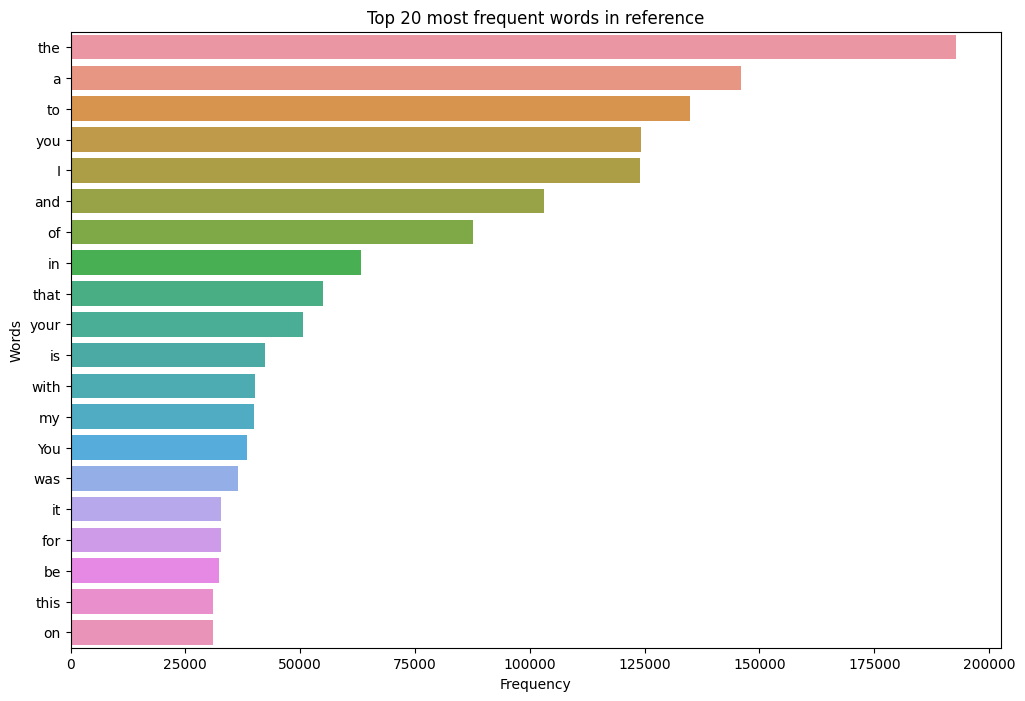

In [13]:
# Plot and save the frequency of the top N words in a given column
column = 'reference'
top_n = 20

# Calculate word frequencies
all_words = ' '.join(df[column].astype(str)).split()
freq_dist = pd.Series(all_words).value_counts()[:top_n]

# Plot the word frequency
plt.figure(figsize=(12, 8))
sns.barplot(x=freq_dist.values, y=freq_dist.index)
plt.title(f'Top {top_n} most frequent words in {column}')
plt.xlabel('Frequency')
plt.ylabel('Words')

Text(0, 0.5, 'Frequency')

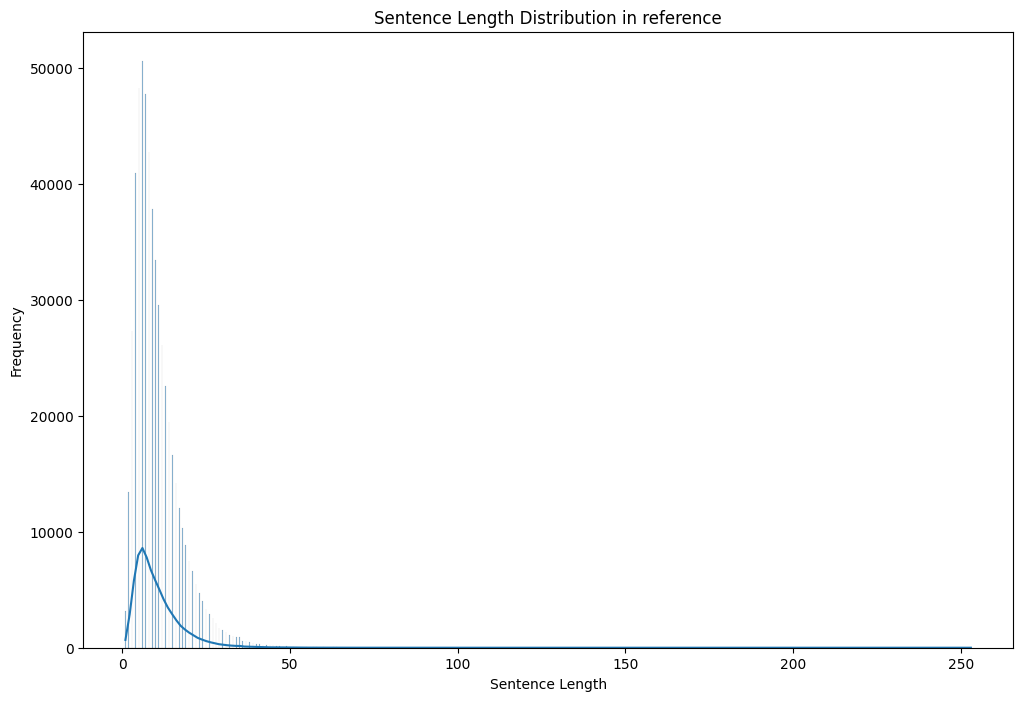

In [14]:
# Plot and save the distribution of sentence lengths for a given column
column = 'reference'

# Calculate sentence lengths
df[f'{column}_len'] = df[column].astype(str).apply(lambda x: len(x.split()))

# Plot the sentence length distribution
plt.figure(figsize=(12, 8))
sns.histplot(df[f'{column}_len'], kde=True)
plt.title(f'Sentence Length Distribution in {column}')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')

Text(0, 0.5, 'translation Length')

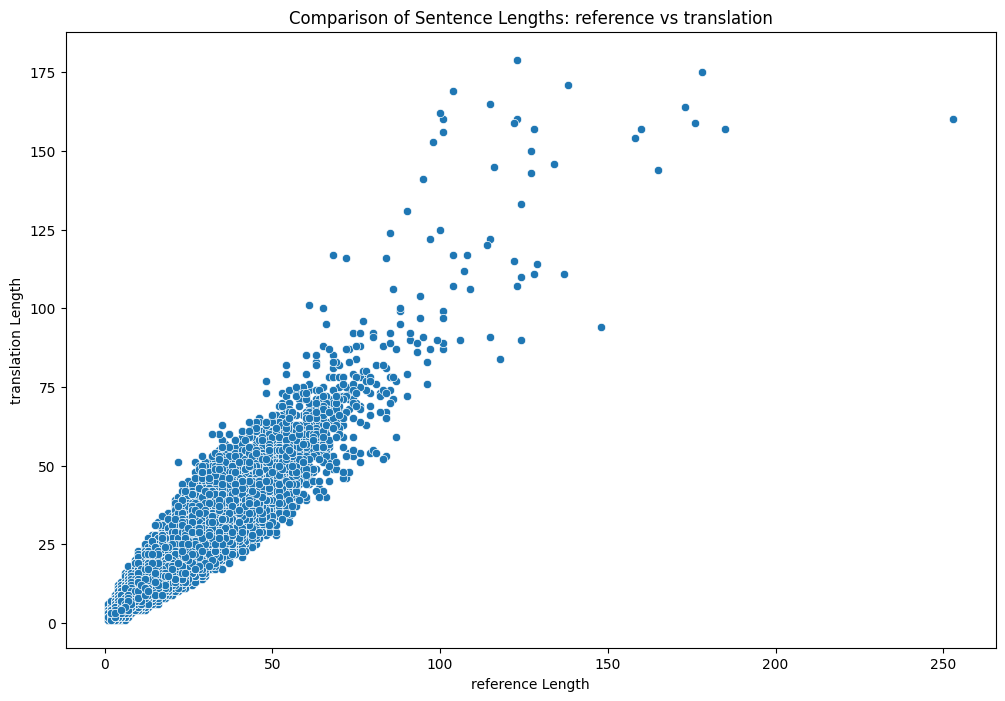

In [15]:
# Create a scatter plot and save it to compare sentence lengths between two columns
column1 = 'reference'
column2 = 'translation'

# Calculate sentence lengths
df[f'{column1}_len'] = df[column1].astype(str).apply(lambda x: len(x.split()))
df[f'{column2}_len'] = df[column2].astype(str).apply(lambda x: len(x.split()))

# Create a scatter plot to compare sentence lengths
plt.figure(figsize=(12, 8))
sns.scatterplot(x=f'{column1}_len', y=f'{column2}_len', data=df)
plt.title(f'Comparison of Sentence Lengths: {column1} vs {column2}')
plt.xlabel(f'{column1} Length')
plt.ylabel(f'{column2} Length')